# （s, s, ...) や (a, a, ...) という系列に対するゆらぎ解析

In [43]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [55]:
def plot_fluctuation_scatter(
    data_name="halfcheetah-expert-v2",
    action_obs_reward='actions',
    total_trajectory_len=10000,
    sub_trajectory_len=100,
    kmeans_pca='k-means',
    round_idx=2,
    n_clusters=10
    ):
    # load data
    env = gym.make(data_name)
    dataset = env.get_dataset()
    data = dataset[action_obs_reward]
    # select sub-actions
    data = data[:total_trajectory_len]

    if kmeans_pca == 'pca':
        if action_obs_reward in ['actions', 'observations']:
            feature = PCA(n_components=1).fit(data).transform(data)
        elif action_obs_reward == 'rewards':
            feature = data
        else:
            print('No such item')
        # round action
        feature = np.round(feature, round_idx)

    elif kmeans_pca == 'k-means':
        feature = KMeans(n_clusters=n_clusters).fit(data).fit_predict(data)
    else:
        print('No such method')
    
    # count actions per sub-trajectories
    num_sub_trajectory = total_trajectory_len // sub_trajectory_len
    count_subsequences = np.zeros((num_sub_trajectory, len(np.unique(feature))))
    for i in tqdm(range(num_sub_trajectory)):
        feature_sub_seq = feature[i * sub_trajectory_len: (i + 1) * sub_trajectory_len]
        for feat in feature_sub_seq:
            for j, feature_class in enumerate(np.unique(feature)):
                if feat == feature_class:
                    count_subsequences[i, j] += 1
    
    # calculate mean and standard deviation per sub-trajectory
    mean_list = [count_subsequences[:, i].mean() for i in range(count_subsequences.shape[1])]
    std_list = [count_subsequences[:, i].std() for i in range(count_subsequences.shape[1])]
    
    # plot scatter
    plt.scatter(mean_list, std_list)
    plt.title(data_name)
    
    # linear fitting
    linear_model=np.polyfit(np.log(mean_list), np.log(std_list), 1)
    linear_model_fn=np.poly1d(linear_model)
    plt.plot(mean_list, np.exp(linear_model_fn(np.log(mean_list))), label=r'$\alpha$' + f': {linear_model[0]:.3f}', color='red')
    
    # plot
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.xlabel(f'Mean frequency of {action_obs_reward} over sub-trajectories')
    plt.ylabel(f'Std of frequency of {action_obs_reward} over sub-trajectories')
    plt.show()

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.28it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

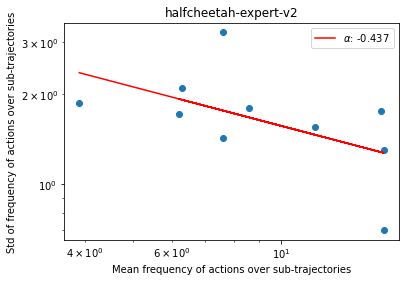

In [56]:
plot_fluctuation_scatter(
    data_name='halfcheetah-expert-v2',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.22it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

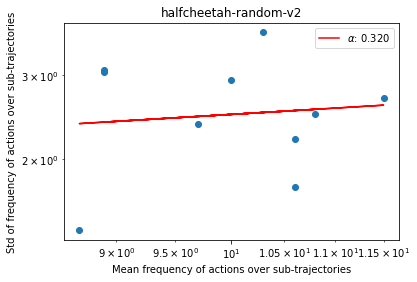

In [57]:
plot_fluctuation_scatter(
    data_name='halfcheetah-random-v2',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.74it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

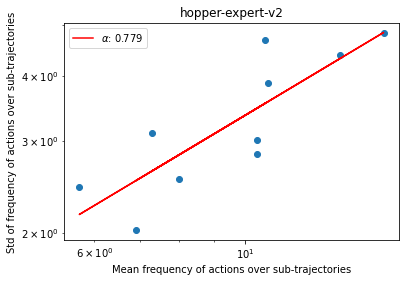

In [58]:
plot_fluctuation_scatter(
    data_name='hopper-expert-v2',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.31it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

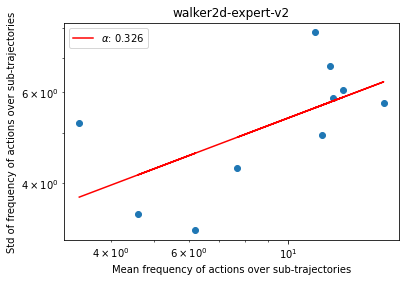

In [59]:
plot_fluctuation_scatter(
    data_name='walker2d-expert-v2',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

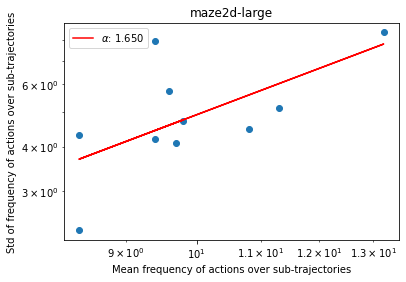

In [60]:
plot_fluctuation_scatter(
    data_name='maze2d-large',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.73417706820905, 25.03890113511653)


load datafile: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.39it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

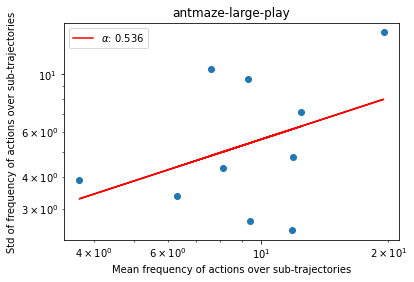

In [61]:
plot_fluctuation_scatter(
    data_name='antmaze-large-play',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.88it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

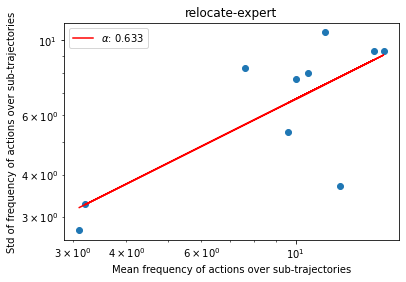

In [62]:
plot_fluctuation_scatter(
    data_name='relocate-expert',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.04it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

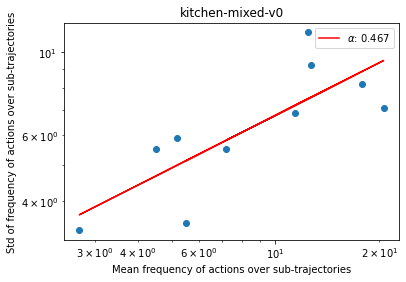

In [63]:
plot_fluctuation_scatter(
    data_name='kitchen-mixed-v0',
    n_clusters=10,
    total_trajectory_len=1000,
    sub_trajectory_len=100,
    action_obs_reward='actions')